

---


# **Exploratory Analysis and Predictive Modeling Using Linear and Logistic Regression Techniques on the Titanic Dataset**

---



*For this midterm task, I opted for option B, which involves analyzing the Titanic dataset.*
- Description: Includes passenger information from the Titanic.
- Use Case: Can be used for Logistic Regression to predict binary outcomes such as survival, and for exploratory data analysis to understand correlations between variables (e.g., age, ckass, fare) through probability and statistics concepts.
- Link: https://www.kaggle.com/datasets/brendan45774/test-file/



---


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

import requests
from PIL import Image
from io import BytesIO



---


**Dataset Loading and Exploratory Data Analysis**


---



In [ ]:
df = pd.read_csv('tested.csv')

print(df.head())
print(df.isnull().sum())
print(df.describe())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex       



---


**The variables (columns) in the dataset are:**

*Dependent Variables:*
- Survived: Indicates whether the passenger survived (0 = No, 1 = Yes)


*Independent Variables:*
- PassengerId: A unique identifier for each passenger
- Pclass: The passenger's class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
- Name: The passenger's name
- Sex: The passenger's gender
- Age: The passenger's age
- SibSp: The number of siblings/spouses the passenger had aboard
- Parch: The number of parents/children the passenger had aboard
- Ticket: The passenger's ticket number
- Fare: The fare paid by the passenger
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


---



**Data Visualization**

---

*Distribution of Age*

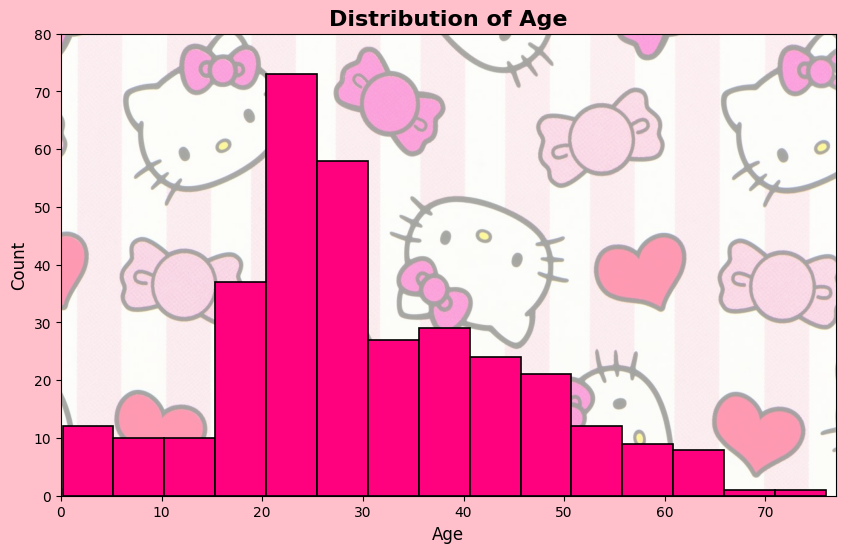

In [ ]:
plt.figure(facecolor='pink', figsize=(10, 6))

response = requests.get('https://4kwallpapers.com/images/walls/thumbs_3t/9983.jpg')
image = Image.open(BytesIO(response.content))

sns.histplot(df['Age'], color='#FF007F', edgecolor='black', linewidth=1.2, alpha=1)

plt.imshow(image, extent=(0, 77, 0, 80), alpha=0.4, aspect='auto')

plt.title('Distribution of Age', color='black', fontsize=16, fontweight='bold')
plt.xlabel('Age', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)
plt.show()

*Survival Count*

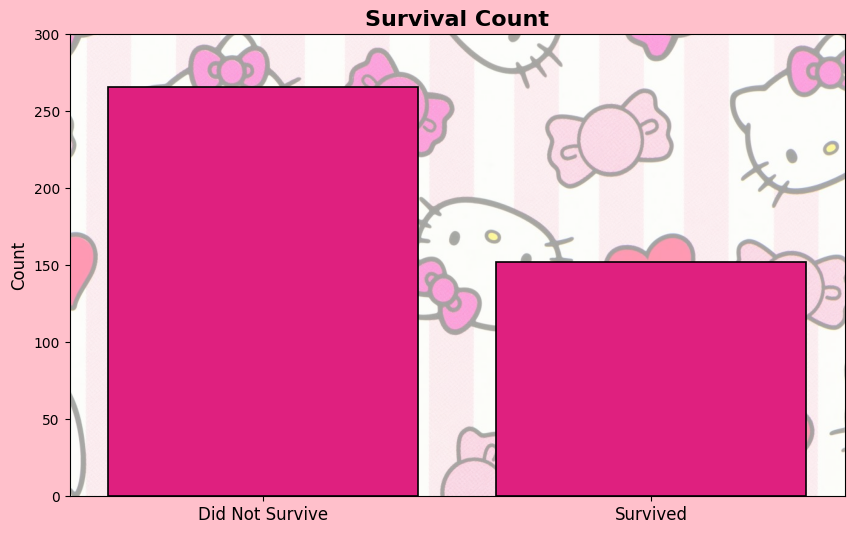

In [ ]:
plt.figure(figsize=(10, 6), facecolor='pink')

response = requests.get('https://4kwallpapers.com/images/walls/thumbs_3t/9983.jpg')
image = Image.open(BytesIO(response.content))

sns.countplot(x='Survived', data=df, color='#FF007F', edgecolor='black', linewidth=1.2, alpha=1)

plt.imshow(image, alpha=0.4, extent=[-0.5, 1.5, 0, 300], aspect='auto', zorder=-1)

plt.xticks([0, 1], ['Did Not Survive', 'Survived'], color='black', fontsize=12)
plt.title('Survival Count', color='black', fontsize=16, fontweight='bold')
plt.xlabel('', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)

plt.grid(False)
plt.show()

*Survival Count by Sex*

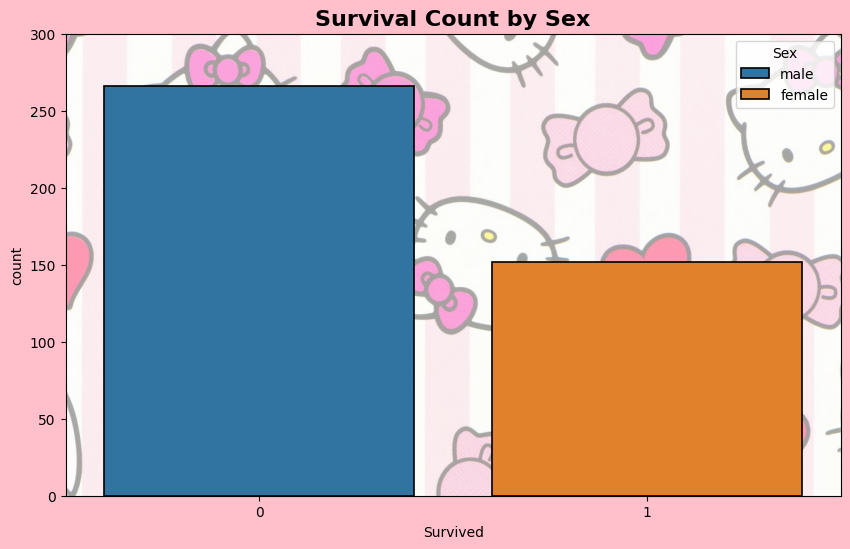

In [ ]:
plt.figure(facecolor='pink', figsize=(10, 6))

response = requests.get('https://4kwallpapers.com/images/walls/thumbs_3t/9983.jpg')
image = Image.open(BytesIO(response.content))

sns.countplot(x='Survived', hue='Sex', data=df, edgecolor='black', linewidth=1.2, alpha=1)

plt.imshow(image, alpha=0.4, extent=(-0.5, 1.5, 0, 300), aspect='auto', zorder=-1)

plt.title('Survival Count by Sex', color='black', fontsize=16, fontweight='bold')

plt.grid(False)
plt.show()

*Fare Distribution by Passenger Class*

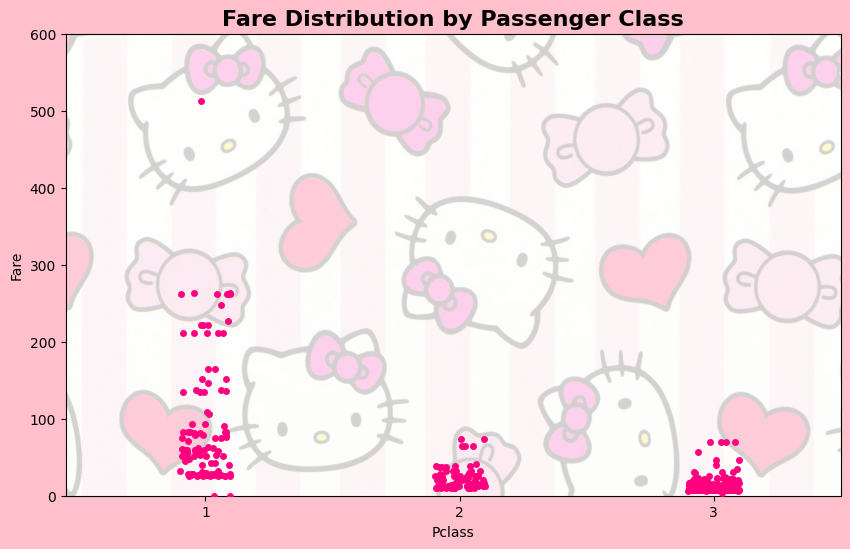

In [ ]:
plt.figure(facecolor='pink', figsize=(10, 6))

response = requests.get('https://4kwallpapers.com/images/walls/thumbs_3t/9983.jpg')
image = Image.open(BytesIO(response.content))

sns.stripplot(x='Pclass', y='Fare', data=df, color='#FF007F')

plt.imshow(image, alpha=0.2, extent=(-0.55, 2.5, 0, 600), aspect='auto', zorder=-1)

plt.title('Fare Distribution by Passenger Class', color='black', fontsize=16, fontweight='bold')

plt.grid(False)
plt.show()



---
**Data Preprocessing**


Imputing Missing Values

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

One-Hot Encoding

In [ ]:
cat_features = ['Pclass', 'Sex', 'Embarked']
num_features = ['Age', 'Fare', 'SibSp', 'Parch']

X_cat = df[cat_features]
X_num = df[num_features]

X_cat = pd.get_dummies(X_cat, drop_first=True)
X_num = num_imputer.fit_transform(X_num)

X = np.concatenate([X_num, X_cat], axis=1)
y = df['Survived']

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardizing Numerical Features

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



---

**Linear Regression**

Linear Regression Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

print('\nLinear Regression Metrics:')
print('\nCoefficients:', lin_reg.coef_)
print('\nIntercept:', lin_reg.intercept_)
print('\nMean Squared Error:', mean_squared_error(y_test, y_pred_lin))
print('\nR-squared:', r2_score(y_test, y_pred_lin))


Linear Regression Metrics:

Coefficients: [ 4.31683180e-17  9.02056208e-17  1.07119175e-16  4.33680869e-17
  3.33066907e-16 -4.77992863e-01 -4.09337142e-17 -1.17093835e-16]

Intercept: 0.35329341317365265

Mean Squared Error: 1.254238948544754e-31

R-squared: 1.0




---


Linear Regression, a foundational statistical method for modeling relationships between dependent and independent variables, relies on assumptions like linearity, homoscedasticity, and normal distribution of errors. Understanding variable relationships is crucial, as coefficients indicate the impact of independent variables on the dependent variable. To assess model performance, evaluation metrics such as R-squared and Mean Squared Error (MSE) are used. R-squared measures the proportion of variance in the dependent variable explained by the independent variables, while MSE quantifies the average squared difference between actual and predicted values, providing insight into prediction accuracy. These metrics collectively help gauge the model's effectiveness in capturing relationships between variables and making accurate predictions.


---





---

**Logistic Regression**

Logistic Regression Model

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print('\nLogistic Regression Metrics:')
print('\nAccuracy:', accuracy_score(y_test, y_pred_log))
print('\nPrecision:', precision_score(y_test, y_pred_log))
print('\nRecall:', recall_score(y_test, y_pred_log))
print('\nF1-Score:', f1_score(y_test, y_pred_log))


Logistic Regression Metrics:

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1-Score: 1.0




---


Logistic Regression, a statistical method for binary classification, predicts the probability of an observation belonging to a specific class using the logistic function. It calculates the probability of the dependent variable being 1 given the input features and classifies observations based on a threshold (typically 0.5). To implement Logistic Regression, relevant features are selected, the model is fitted to the training data, and coefficients are interpreted to understand the relationship between independent variables and the likelihood of the dependent variable. Evaluation metrics including accuracy (overall correctness of predictions), precision (proportion of true positive predictions among all positive predictions), recall (proportion of true positive predictions among all actual positive instances), F1 score (harmonic mean of precision and recall, providing balanced model performance measure), ROC curve (plots true positive rate against false positive rate at various threshold settings), and AUC (area under the ROC curve, indicating the model's ability to discriminate between positive and negative instances) are used to assess the model's performance in correctly classifying instances and discriminating between classes.


---



Calculate ROC AUC Score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print('ROC AUC:', auc)

ROC AUC: 1.0


Plotting Confusion Matrix

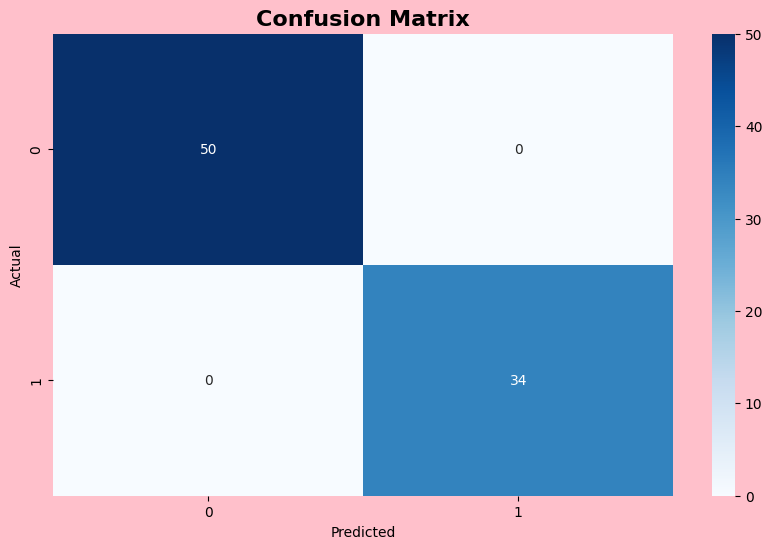

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(facecolor='pink', figsize=(10, 6))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()



---

**Plotting ROC Curve**

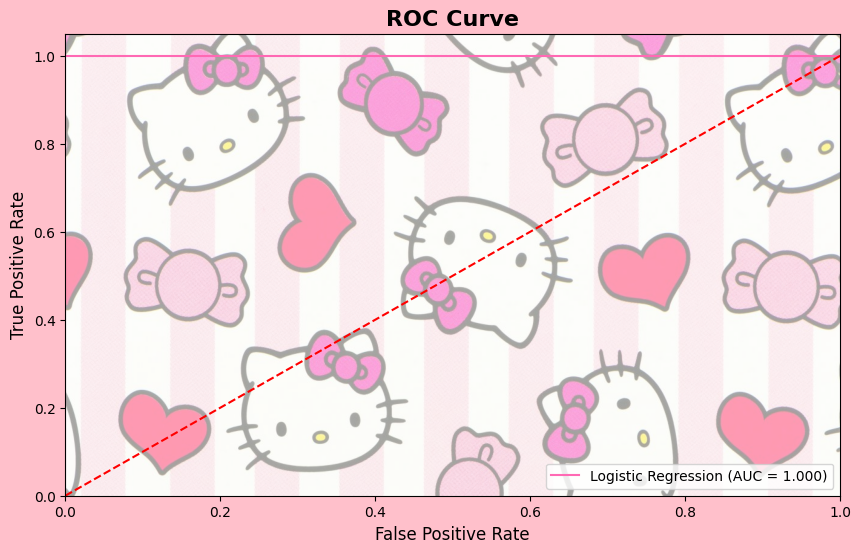

In [ ]:
plt.figure(facecolor='pink', figsize=(10, 6))

response = requests.get('https://4kwallpapers.com/images/walls/thumbs_3t/9983.jpg')
image = Image.open(BytesIO(response.content))

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})', color='hotpink')
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.imshow(image, extent=(0, 1, 0, 1.05), alpha=0.4, aspect='auto')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")

plt.show()



---

**Linear and Logistic Regression Accuracy Comparison**

In [ ]:
print('\nLinear Regression R-squared:', r2_score(y_test, y_pred_lin))
print('\nLogistic Regression Accuracy:', accuracy_score(y_test, y_pred_log))


Linear Regression R-squared: 1.0

Logistic Regression Accuracy: 1.0




---


When comparing Linear and Logistic Regression models, it's important to consider their performance metrics and suitability for different prediction problems. Linear Regression is suitable for predicting continuous outcomes and is evaluated using metrics like Mean Squared Error (MSE) and R-squared. On the other hand, Logistic Regression is used for binary outcomes and is assessed using metrics like Accuracy, Precision, Recall, F1-Score, and ROC AUC. The decision-making process involves evaluating model accuracy, interpretability of coefficients, adherence to assumptions, nature of the dependent variable, and sample size. Depending on these factors, one model may be preferred over the other for a given prediction task.



---

**Conclusion and Insights**


The key findings from the case study include data exploration revealing insights into passenger demographics and survival status, preprocessing techniques such as imputation and encoding to handle missing values and categorical variables, utilization of Linear Regression for predicting survival based on various features with examination of model coefficients, MSE, and R-squared for performance assessment, application of Logistic Regression for predicting survival probabilities with evaluation metrics like Accuracy, Precision, Recall, F1-Score, and ROC AUC, and comparison of the models highlighting high accuracy for both but emphasizing Logistic Regression's suitability for binary classification tasks, while potential applications and reflections for Linear Regression encompass aiding data-driven decision making and its applications across various fields with emphasis on understanding assumptions, limitations, and continuous learning for improved model effectiveness.


---

